In [1]:
# Import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [2]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2*X[0,0]) + np.cos(3*X[:,1])

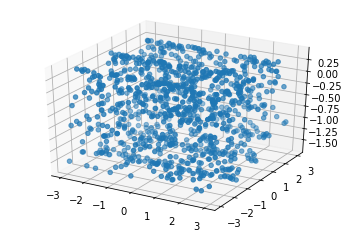

In [3]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show();

In [4]:
# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

In [5]:
# Define the layers of the model
input_layer = tf.keras.layers.Input(shape=(2,))
hidden_one = tf.keras.layers.Dense(128, activation='relu')
output_layer = tf.keras.layers.Dense(1)

In [6]:
# Build the model
model = tf.keras.models.Sequential([input_layer, 
                                    hidden_one, 
                                    output_layer])

In [7]:
# Define how the model should be trained
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

In [8]:
# Train the model
result = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs = 150)

Train on 750 samples, validate on 250 samples
Epoch 1/150
750/750 [==============================] - 1s 931us/sample - loss: 0.5652 - val_loss: 0.5051
Epoch 2/150
750/750 [==============================] - 0s 110us/sample - loss: 0.5220 - val_loss: 0.4400
Epoch 3/150
750/750 [==============================] - 0s 116us/sample - loss: 0.4870 - val_loss: 0.4760
Epoch 4/150
750/750 [==============================] - 0s 117us/sample - loss: 0.4992 - val_loss: 0.4429
Epoch 5/150
750/750 [==============================] - 0s 111us/sample - loss: 0.5012 - val_loss: 0.4405
Epoch 6/150
750/750 [==============================] - 0s 115us/sample - loss: 0.4738 - val_loss: 0.4445
Epoch 7/150
750/750 [==============================] - 0s 120us/sample - loss: 0.4787 - val_loss: 0.4321
Epoch 8/150
750/750 [==============================] - 0s 120us/sample - loss: 0.4848 - val_loss: 0.5060
Epoch 9/150
750/750 [==============================] - 0s 115us/sample - loss: 0.4919 - val_loss: 0.4224
Epoch 10/

Epoch 78/150
750/750 [==============================] - 0s 110us/sample - loss: 0.0095 - val_loss: 0.0057
Epoch 79/150
750/750 [==============================] - 0s 106us/sample - loss: 0.0054 - val_loss: 0.0052
Epoch 80/150
750/750 [==============================] - 0s 110us/sample - loss: 0.0061 - val_loss: 0.0119
Epoch 81/150
750/750 [==============================] - 0s 107us/sample - loss: 0.0141 - val_loss: 0.0130
Epoch 82/150
750/750 [==============================] - 0s 109us/sample - loss: 0.0157 - val_loss: 0.0144
Epoch 83/150
750/750 [==============================] - 0s 150us/sample - loss: 0.0091 - val_loss: 0.0105
Epoch 84/150
750/750 [==============================] - 0s 200us/sample - loss: 0.0085 - val_loss: 0.0068
Epoch 85/150
750/750 [==============================] - 0s 372us/sample - loss: 0.0057 - val_loss: 0.0071
Epoch 86/150
750/750 [==============================] - 0s 356us/sample - loss: 0.0047 - val_loss: 0.0048
Epoch 87/150
750/750 [========================

In [9]:
# Print the results
print("Train mse:", model.evaluate(x=X_train, y=y_train, verbose=0));
print("Test mse:", model.evaluate(x=X_test, y=y_test, verbose=0));

Train mse: 0.0037718690518910684
Test mse: 0.003985504020005464


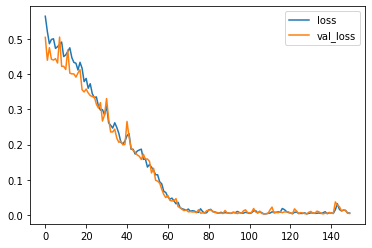

In [10]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='loss');
plt.plot(result.history['val_loss'], label='val_loss');
plt.legend();

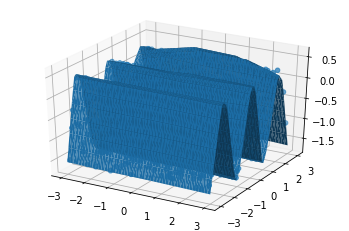

In [13]:
# Plot the prediction surface
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

# Surface Plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

This shows that the neural network can model cos function without actually using cos in the model. That's pretty cool! But can the model extrapolate beyond -3 and 3?

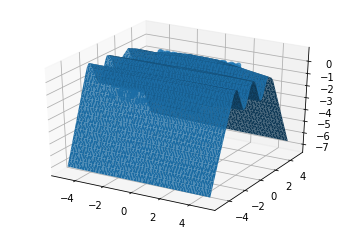

In [14]:
# Plot the prediction surface
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

# Surface Plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Nope. The cos form isn't maintained beyond -3 and 3.